In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.FireFramework import * # importieren des Frameworks
from PIL import Image

import utility.animation_utility as anim
import utility.io_utility as io

# Modelldefinition

In [2]:
def dot(a,b):
    return a[0]*b[0]+a[1]*b[1]

In [3]:
# Liste der pro Zelle zu speichernden Werte
params = ["fuel", "fire", "windx", "windy", "height", "burned"]

# Relativvektoren der zu betrachtenen Nachbarn
relative_neighbours = [(-1,0),(1,0),(0,1),(0,-1),(-1,1),(1,1),(-1,-1),(1,-1)] 

In [4]:
def transition(cellState, neighbourStates, returnState):
    
    #Parameter der Nachbarn:
    slope = []
    rel_wind = []
    neighbour_fire = []

    #Vorbereitung der Werte der Nachbarn
    for n in neighbourStates:
        slope.append(np.tanh(n.getParam("height") - cellState.getParam("height")))
        wind = (n.getParam("windx"), n.getParam("windy"))
        rel_wind.append(np.tanh(dot(wind, n.getRelativeVector())))
        neighbour_fire.append(n.getParam("fire"))    

    #Konvertieren zu numpy arrays
    slope = np.array(slope)
    rel_wind = np.array(rel_wind)
    neighbour_fire = np.array(neighbour_fire)

    #Wahrscheinlichkeiten berechnen

    slope_coeff = - np.sum(neighbour_fire * slope)
    wind_coeff = - np.sum(neighbour_fire * rel_wind)
    
    p_burn = 1/8 * np.sum(neighbour_fire) + 0.05 * slope_coeff + 0.1 * wind_coeff
    p_burn *= cellState.getParam("fuel")
    
    p_stop = (1 - cellState.getParam("fuel")) ** 8  #Erlöschen bei wenig Brennwert
    
    #Wahrscheinlichkeiten umsetzen
    
    
    if p_burn >= np.random.uniform():
        returnState.setParam("fire", 1)
    
    if cellState.getParam("fire") == 1:
        if p_stop >= np.random.uniform():
            returnState.setParam("fire", 0)
            returnState.setParam("burned", 1)
    


        
    returnState.addToParam("fuel", -0.05*cellState.getParam("fire")) # Verringerung des Brennwerts
    if returnState.getParam("fuel") < 0:
        returnState.setParam("fuel", 0)

## Startwerte definieren

In [5]:

"""
def initial_field(row, col):
    fuel = 0.99
    burn = 0
    burned = 0
    if row == 24 and col == 24: burn = 1
    
    height = 0
    windx = 0
    windy = 0
    
    return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return
    
"""

'\ndef initial_field(row, col):\n    fuel = 0.99\n    burn = 0\n    burned = 0\n    if row == 24 and col == 24: burn = 1\n    \n    height = 0\n    windx = 0\n    windy = 0\n    \n    return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return\n    \n'

In [6]:
def var_fuel(size, N, start, stop, incr):
    def initial_field(row, col):
        fuel = pfuel
        burn = 0
        burned = 0
        if row == size/2-1 and col == size/2-1: burn = 1
    
        height = 0
        windx = 0
        windy = 0
    
        return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return
    
    
    result = []

    pfuel = start
    while pfuel <= stop:
        
        # Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben..
        g = Grid(size, size, params, relative_neighbours, transition, initial_field)
        
        # Läuft mehrere Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
        result.append(g.runModel(N))
        
        pfuel = pfuel + incr
        
    return result

In [7]:
def var_windx(size, N, start, stop, incr):
    def initial_field(row, col):
        fuel = 0.99
        burn = 0
        burned = 0
        if row == size/2-1 and col == size/2-1: burn = 1
    
        height = 0
        windx = pwindx
        windy = 0
    
        return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return
    
    
    result = []

    pwindx = start
    while pwindx <= stop:
        
        # Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben..
        g = Grid(size, size, params, relative_neighbours, transition, initial_field)
        
        # Läuft mehrere Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
        result.append(g.runModel(N))
        
        pwindx = pwindx + incr
        
    return result

In [8]:
def var_windy(size, N, start, stop, incr):
    def initial_field(row, col):
        fuel = 0.99
        burn = 0
        burned = 0
        if row == size/2-1 and col == size/2-1: burn = 1
    
        height = 0
        windx = 0
        windy = pwindy
    
        return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return
    
    
    result = []

    pwindy = start
    while pwindy <= stop:
        
        # Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben..
        g = Grid(size, size, params, relative_neighbours, transition, initial_field)
        
        # Läuft mehrere Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
        result.append(g.runModel(N))
        
        pwindy = pwindy + incr
        
    return result

In [9]:
def var_slope(size, N, start, stop, incr):
    def initial_field(row, col):
        fuel = 0.99
        burn = 0
        burned = 0
        if row == size/2-1 and col == size/2-1: burn = 1
    
        height = slope*row
        
        
        windx = 0
        windy = 0
    
        return [fuel, burn, windx, windy, height, burned] # Hier der Anfangswert-return
    
    
    result = []

    slope = start
    while slope <= stop:
        
        # Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben..
        g = Grid(size, size, params, relative_neighbours, transition, initial_field)
        
        # Läuft mehrere Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
        result.append(g.runModel(N))
        
        slope = slope + incr
        
    return result

### Modell auswerten

In [10]:
# Nimmt ein numpy-array an welches zb. durch g.runModel() erzeugt wird.
# Zeichnet das Feld auf bekannte Weise unter angabe des zeitindex.
def drawImage(field,index):
    plt.imshow(np.stack([field[index,:,:,1],field[index,:,:,0],np.zeros(shape = (field.shape[1], field.shape[2]))], axis = 2))

In [11]:
# Läuft mehrere Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
#N = 10
#result = g.runModel(N)

In [12]:
# save data:
path = "data/result_output_vari"

In [13]:
io.write(var_windx(20, 20, 0, 200, 100), path)

5%
15%
25%
35%
45%
55%
65%
75%
85%
95%
5%
15%
25%
35%
45%
55%
65%
75%
85%
95%
5%
15%
25%
35%
45%
55%
65%
75%
85%
95%


In [14]:
# Nimmt ein numpy-array an welches zb. durch g.runModel() erzeugt wird.
# Zeichnet das Feld auf bekannte Weise unter angabe des zeitindex.
def drawImage(field,index):
    plt.imshow(np.stack([field[index,:,:,1],field[index,:,:,0],np.zeros(shape = (field.shape[1], field.shape[2]))], axis = 2))

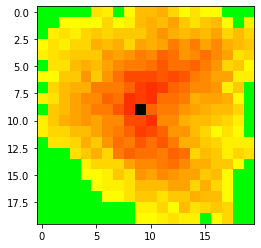

In [15]:
drawImage(io.read(path)[0], 19)

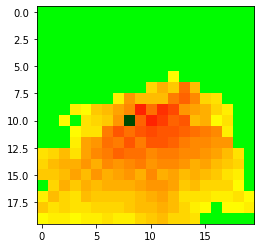

In [16]:
drawImage(io.read(path)[2], 19)

In [17]:
"""
%matplotlib notebook
anim.animate(path, 1)
"""

'\n%matplotlib notebook\nanim.animate(path, 1)\n'